In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading data
dt=pd.read_csv('loan_data.csv')


In [3]:
dt.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
#checking how many not paid
dt['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [6]:
#checking creditpolicy counts
dt['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [49]:
dt['not.fully.paid'][dt['credit.policy']==1].value_counts()

0    6696
1    1014
Name: not.fully.paid, dtype: int64

In [56]:
dt['not.fully.paid'][dt['credit.policy']==0].value_counts()

0    1349
1     519
Name: not.fully.paid, dtype: int64

In [132]:
import seaborn as sns


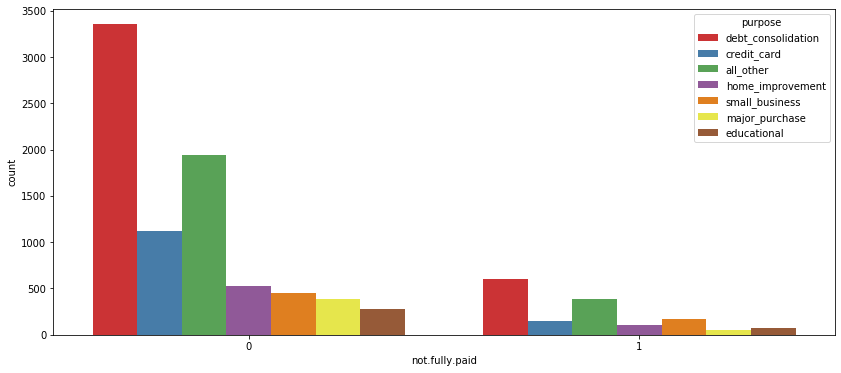

In [96]:
n=dt['purpose'][dt['not.fully.paid']==1].value_counts().values
i=dt['purpose'].unique()
#no of not paid customers with each purpose
plt.figure(figsize=(14,6))
sns.countplot(x=dt['not.fully.paid'],hue=dt['purpose'],palette='Set1')

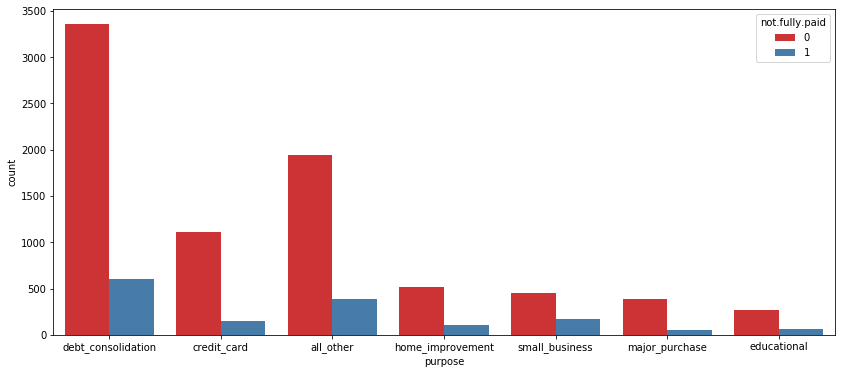

In [133]:
plt.figure(figsize=(14,6))
sns.countplot(x=dt['purpose'],hue=dt['not.fully.paid'],palette='Set1')

In [42]:
import seaborn as sns


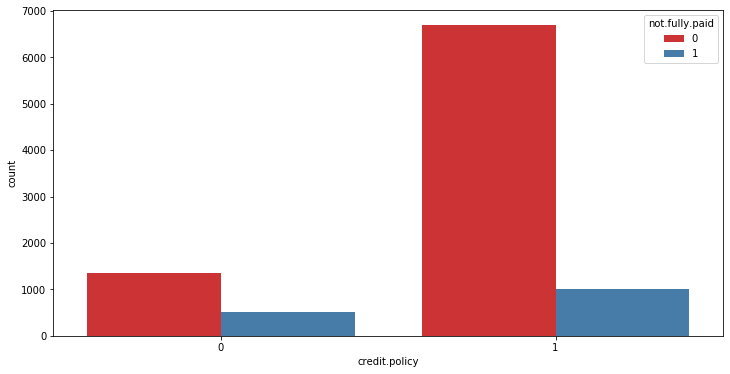

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(x=dt['credit.policy'],hue=dt['not.fully.paid'],palette='Set1')

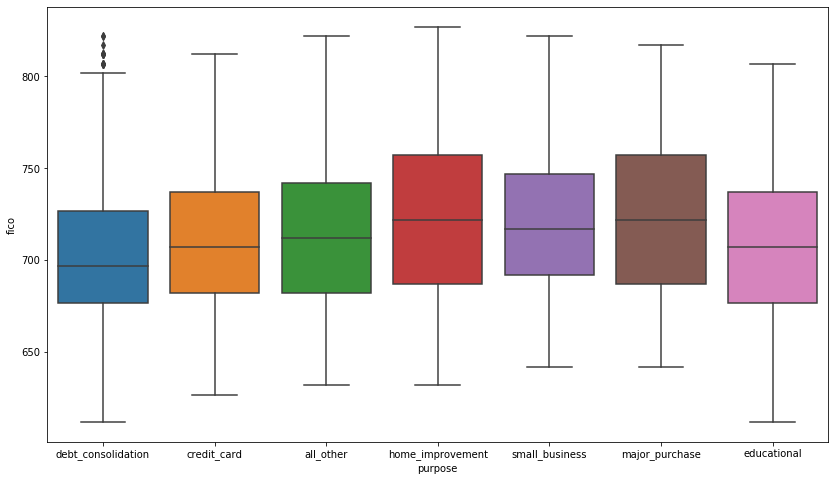

In [113]:
plt.figure(figsize=(14,8))
sns.boxplot(x=dt['purpose'],y=dt['fico'])

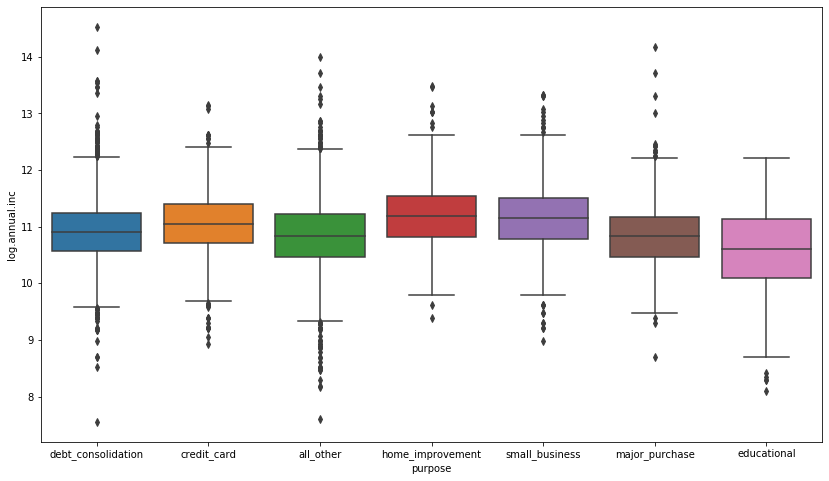

In [131]:
plt.figure(figsize=(14,8))
sns.boxplot(x=dt['purpose'],y=dt['log.annual.inc'])

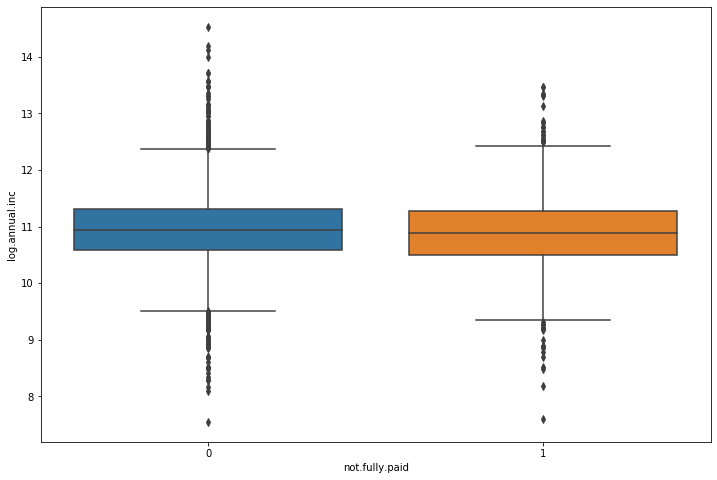

In [136]:
plt.figure(figsize=(12,8))
sns.boxplot(x=dt['not.fully.paid'],y=dt['log.annual.inc'])

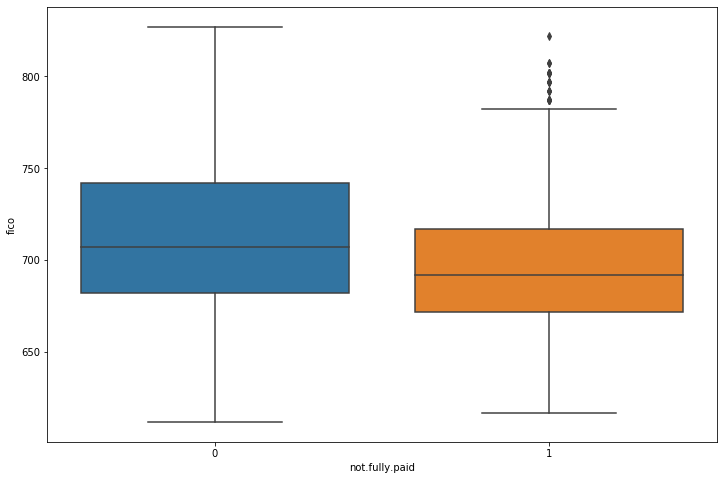

In [137]:
plt.figure(figsize=(12,8))
sns.boxplot(x=dt['not.fully.paid'],y=dt['fico'])

In [127]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [129]:
dtf = pd.get_dummies(dt,['purpose'],drop_first=True)

In [130]:
dtf.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [139]:
from sklearn.model_selection import train_test_split
X = dtf.drop('not.fully.paid',axis=1)
y = dtf['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
nbc=GaussianNB()

In [143]:
nbc.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
nbc_pred=nbc.predict(X_test)

In [154]:
from sklearn.metrics import classification_report,accuracy_score

In [171]:
print('Using Naive Bayes Classifier \n',classification_report(nbc_pred,y_test))
print(accuracy_score(nbc_pred,y_test))

Using Naive Bayes Classifier 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      2747
           1       0.08      0.30      0.13       127

    accuracy                           0.82      2874
   macro avg       0.52      0.57      0.51      2874
weighted avg       0.92      0.82      0.87      2874

0.8204592901878914


In [156]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [172]:
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print('Using Logistic Regression \n',classification_report(lr_pred,y_test))
print(accuracy_score(lr_pred,y_test))

Using Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      2866
           1       0.01      0.38      0.01         8

    accuracy                           0.84      2874
   macro avg       0.50      0.61      0.46      2874
weighted avg       1.00      0.84      0.91      2874

0.837508698677801


C:\Users\naren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [173]:
from sklearn.tree import DecisionTreeClassifier
det=DecisionTreeClassifier(max_depth=5)
det.fit(X_train,y_train)
det_pred=det.predict(X_test)
print('Using Decision Tree\n',classification_report(det_pred,y_test))

Using Decision Tree
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      2821
           1       0.04      0.32      0.07        53

    accuracy                           0.83      2874
   macro avg       0.51      0.58      0.49      2874
weighted avg       0.97      0.83      0.89      2874



In [174]:
from sklearn.svm import SVC
svc=SVC(gamma='auto')
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
print('Using Support Vector Machines\n',classification_report(svc_pred,y_test))

Using Support Vector Machines
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      2874
           1       0.00      0.00      0.00         0

    accuracy                           0.84      2874
   macro avg       0.50      0.42      0.46      2874
weighted avg       1.00      0.84      0.91      2874



C:\Users\naren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,max_depth=2)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print('Using Random Forest\n',classification_report(rfc_pred,y_test))

Using Random Forest
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      2874
           1       0.00      0.00      0.00         0

    accuracy                           0.84      2874
   macro avg       0.50      0.42      0.46      2874
weighted avg       1.00      0.84      0.91      2874



C:\Users\naren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)
print('Using Gradient Boosting\n',classification_report(gbc_pred,y_test))

Using Gradient Boosting
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      2850
           1       0.02      0.33      0.03        24

    accuracy                           0.84      2874
   macro avg       0.51      0.59      0.47      2874
weighted avg       0.99      0.84      0.90      2874



In [ ]:
# highest accuracies are given by ensemble methods